In [85]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [86]:
data_set_path = "/kaggle/input/sms-spam-collection-dataset/spam.csv"

In [87]:
import pandas as pd
import numpy as np

df = pd.read_csv(data_set_path, encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [89]:
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [90]:
df.sample(5)

,message_type,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
4974,ham,Yar... I tot u knew dis would happen long ago ...,NaN,NaN,NaN
3222,ham,Well that must be a pain to catch,NaN,NaN,NaN
2791,ham,"Û_ we r stayin here an extra week, back next ...",Well there's still a bit left if you guys want...,NaN,NaN
5245,ham,Thank you princess! I want to see your nice ju...,NaN,NaN,NaN
1329,ham,I dont know what to do to come out of this so ...,NaN,NaN,NaN


In [91]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

,message_type
4020,0
143,0
4283,0
4189,0
613,0


In [92]:
df[df['message_type']==1]

,message_type,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
5,1,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
8,1,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,1,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN


In [93]:
df.isnull().sum()
df.duplicated().sum()

np.int64(403)

In [94]:
df= df.drop_duplicates()

In [95]:
df.head()

,message_type,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **Exploratory Data Analysis**

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df['message_type'].value_counts()

,count
message_type,
0,4516
1,653


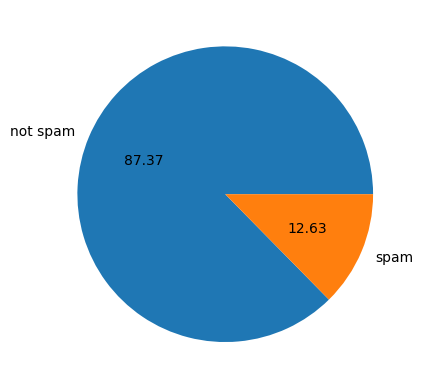

In [98]:
plt.pie(df['message_type'].value_counts(), labels=['not spam', 'spam'], autopct="%0.2f")
plt.show()

In [99]:
import nltk
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [101]:
from nltk.tokenize import word_tokenize
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words
4890,0,Its worse if if uses half way then stops. Its ...,NaN,NaN,NaN,76,18
3763,0,Would me smoking you out help us work through ...,NaN,NaN,NaN,65,12
1978,0,No I'm in the same boat. Still here at my moms...,NaN,NaN,NaN,83,25
5536,0,Aiyah ok wat as long as got improve can alread...,NaN,NaN,NaN,54,12
1180,0,I'm in chennai velachery:),NaN,NaN,NaN,26,7


In [102]:
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,message_type,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
1354,0,Baaaaabe! I misss youuuuu ! Where are you ? I ...,NaN,NaN,NaN,84,21,4
5070,0,As in different styles?,NaN,NaN,NaN,23,5,1
4240,0,Detroit. The home of snow. Enjoy it.,NaN,NaN,NaN,36,10,3
2607,0,:-) yeah! Lol. Luckily i didn't have a starrin...,NaN,NaN,NaN,62,18,3
4595,0,Carlos is down but I have to pick it up from h...,NaN,NaN,NaN,86,23,1


In [103]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [104]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


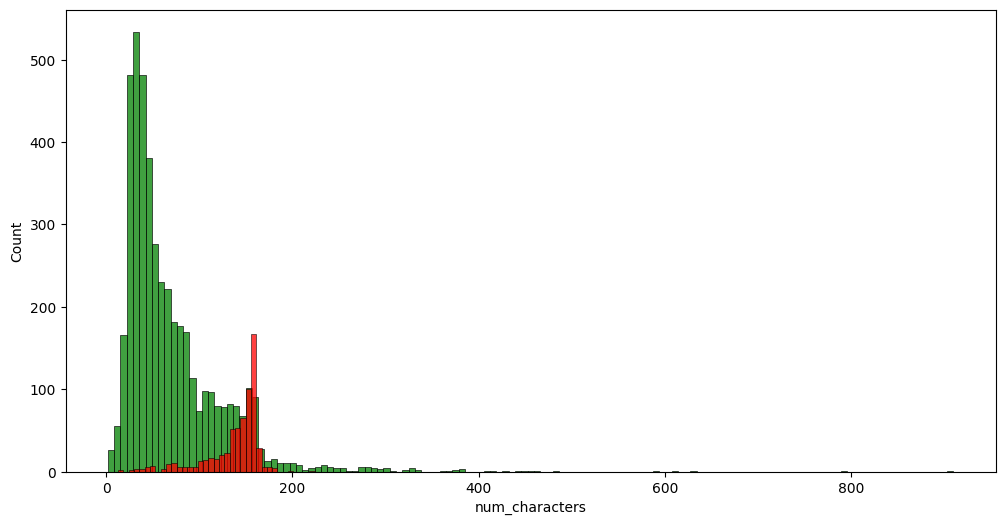

In [105]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type'] == 0]['num_characters'], color='green')
sns.histplot(df[df['message_type'] == 1]['num_characters'], color='red')
plt.show()

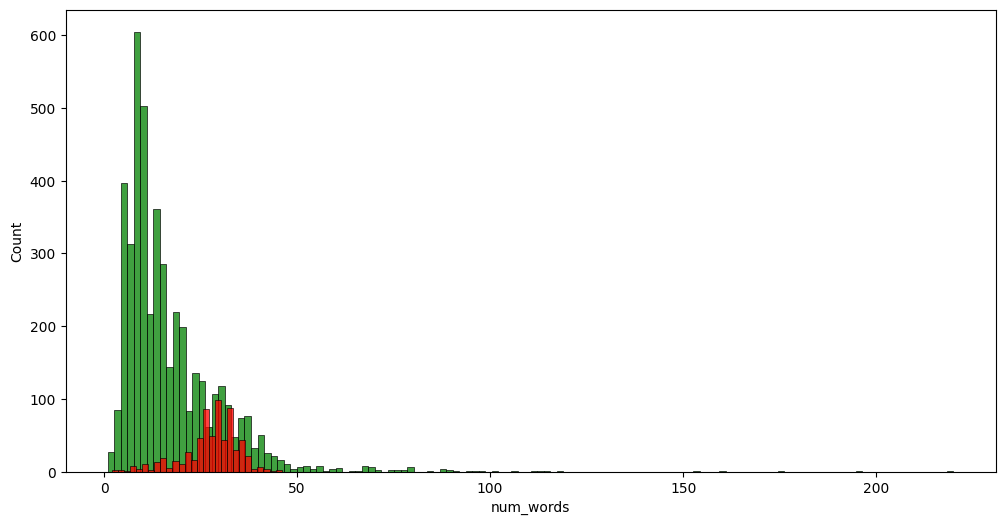

In [106]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')
plt.show()

In [107]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.head()

,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

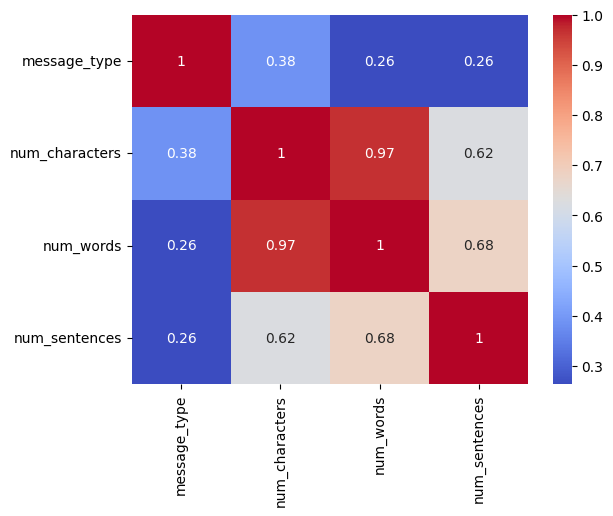

In [108]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")

# **Data Preprocessing**

In [109]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()

def text_transform(message):
  # message lowering
  message = message.lower()

  # tokenizer
  tokens = nltk.word_tokenize(message)

  # keep only alphanumeric
  tokens = [token for token in tokens if token.isalnum()]

  # removing stop words and punctuation
  tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]

  # stemming the words
  tokens = [ps.stem(word) for word in tokens]

  return " ".join(tokens)


df['transformed_message'] = df['message'].apply(text_transform)

df.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [110]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

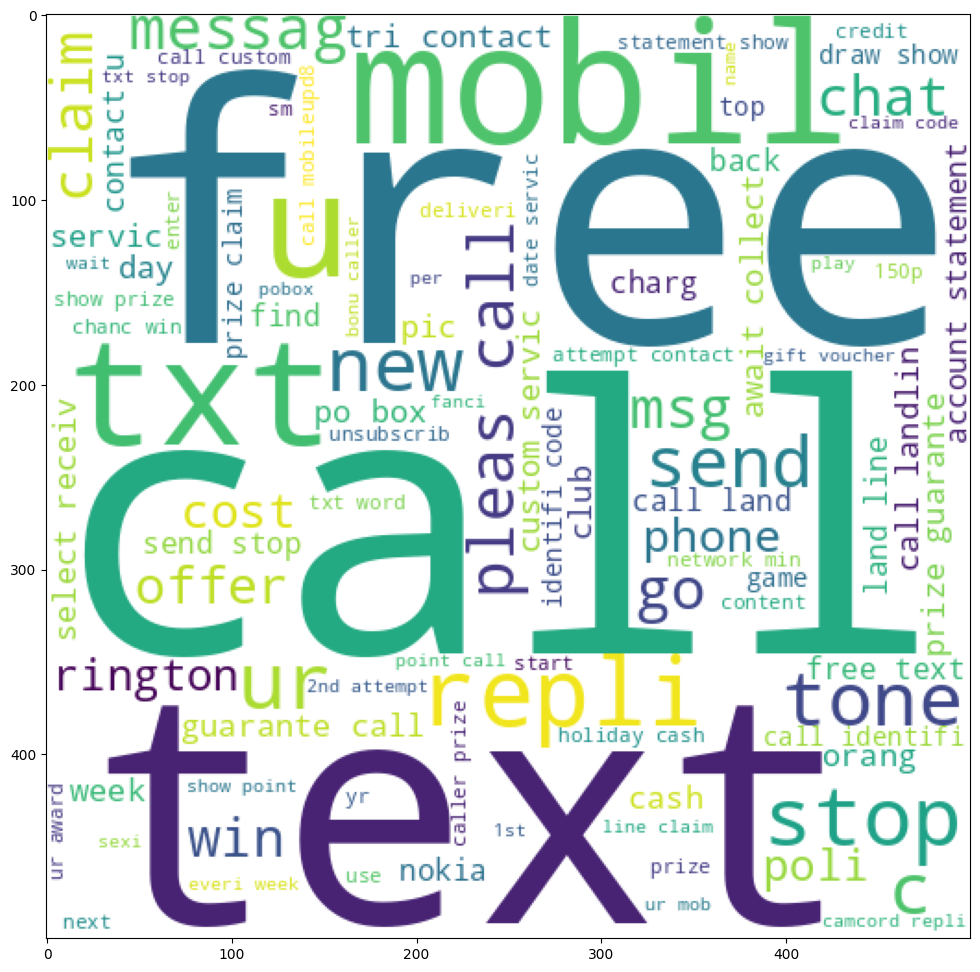

In [111]:
spam_wc = wc.generate(df[df['message_type'] == 1]['transformed_message'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)
plt.show()

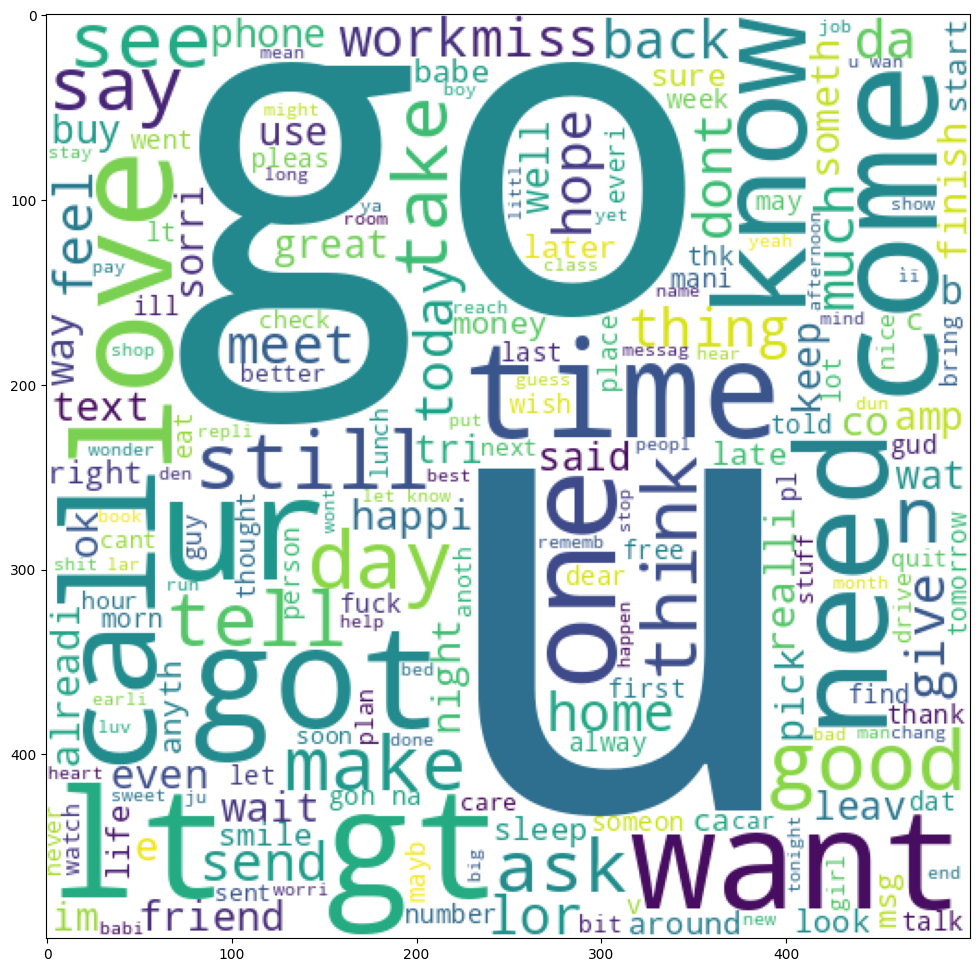

In [112]:
# FOR NOT-SPAM

ham_wc=wc.generate(df[df['message_type']==0]['transformed_message'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)
plt.show()

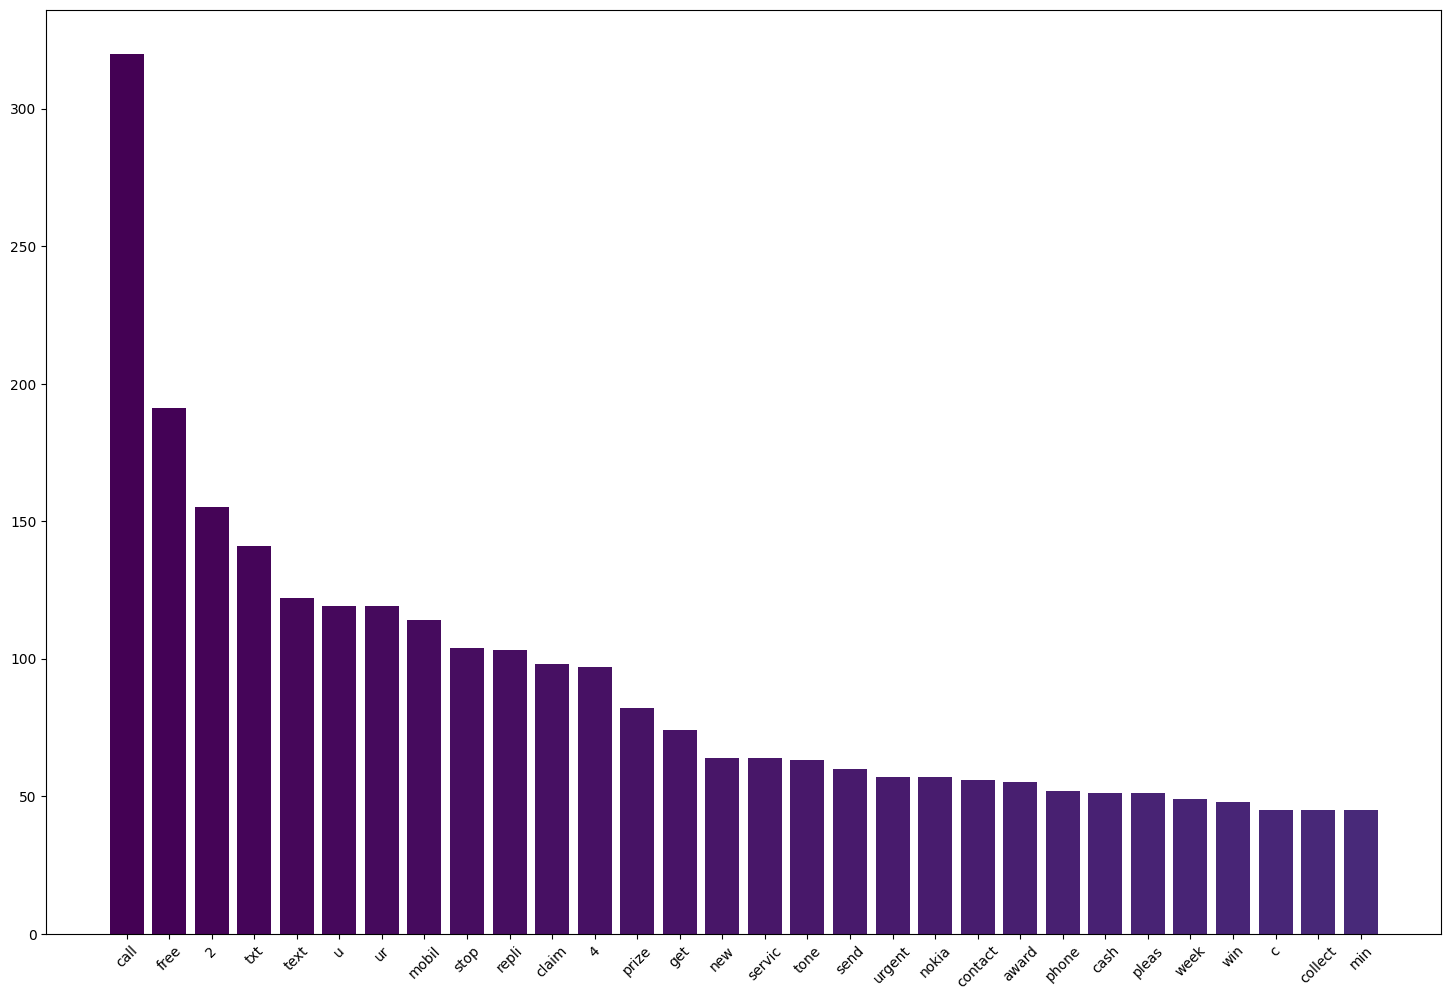

In [113]:
sample_corpus = []

for mesg in df[df['message_type']==1]['transformed_message'].tolist():
  for word in mesg.split():
    sample_corpus.append(word)

from collections import Counter
sample_corpus = Counter(sample_corpus)

top_30 = sample_corpus.most_common(30)

import pandas as pd

df_top = pd.DataFrame(top_30, columns=['word', 'count'])
colors = plt.cm.viridis(range(len(df_top)))
plt.figure(figsize=(18,12))
plt.bar(df_top["word"], df_top["count"], color=colors)
plt.xticks(rotation=45)
plt.show()

# **Building a Model using Naive Bayes**

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)

In [117]:
X = tfidf.fit_transform(df['transformed_message']).toarray()
y = df['message_type'].values

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [120]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [121]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [122]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.874274661508704
Confusion Matrix of Guassian NB is:  [[790 106]
 [ 24 114]]
Precision score of the Gaussian NB is 0.5181818181818182


In [123]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9709864603481625
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 30 108]]
Precision score of the Multinomial NB is 1.0


In [124]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9835589941972921
Confusion Matrix of Bernoulli NB is:  [[895   1]
 [ 16 122]]
Precision score of the Bernoulli NB is 0.991869918699187
